<h1>Breast cancer classification</h1>


<h2>Data analisis</h1>


In [1]:
import pandas as pd
import pandas_profiling 
import numpy as np
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('Data/CancerData.csv')
data.head()
accuracy_all = []
cvs_all = []

In [3]:
profile = pandas_profiling.ProfileReport(data)

/home/desarrollo/anaconda3/lib/python3.7/site-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [4]:
profile

Number of variables,33
Number of observations,569
Total Missing (%),3.0%
Total size in memory,146.8 KiB
Average record size in memory,264.2 B
Numeric,21
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,11


In [5]:
data = data.drop('Unnamed: 32',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

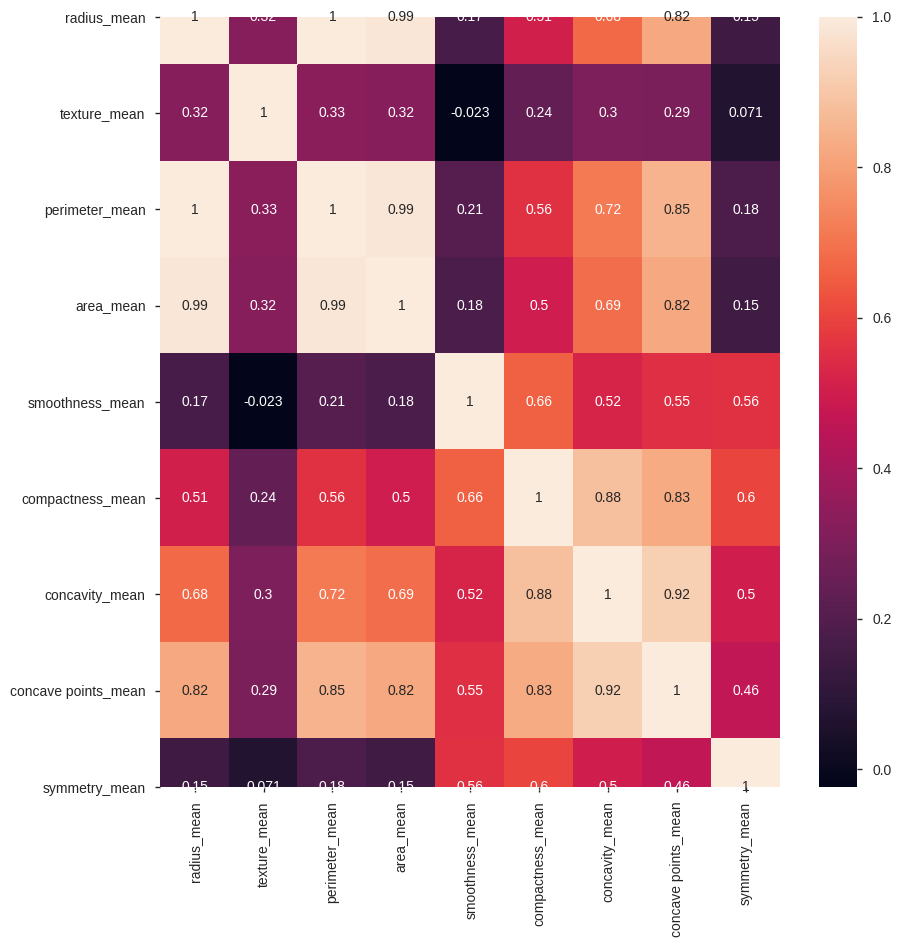

In [6]:
features_mean = list(data.columns[1:11])
plt.figure(figsize=(10,10))
sns.heatmap(data[features_mean].corr(), annot=True)
plt.show()

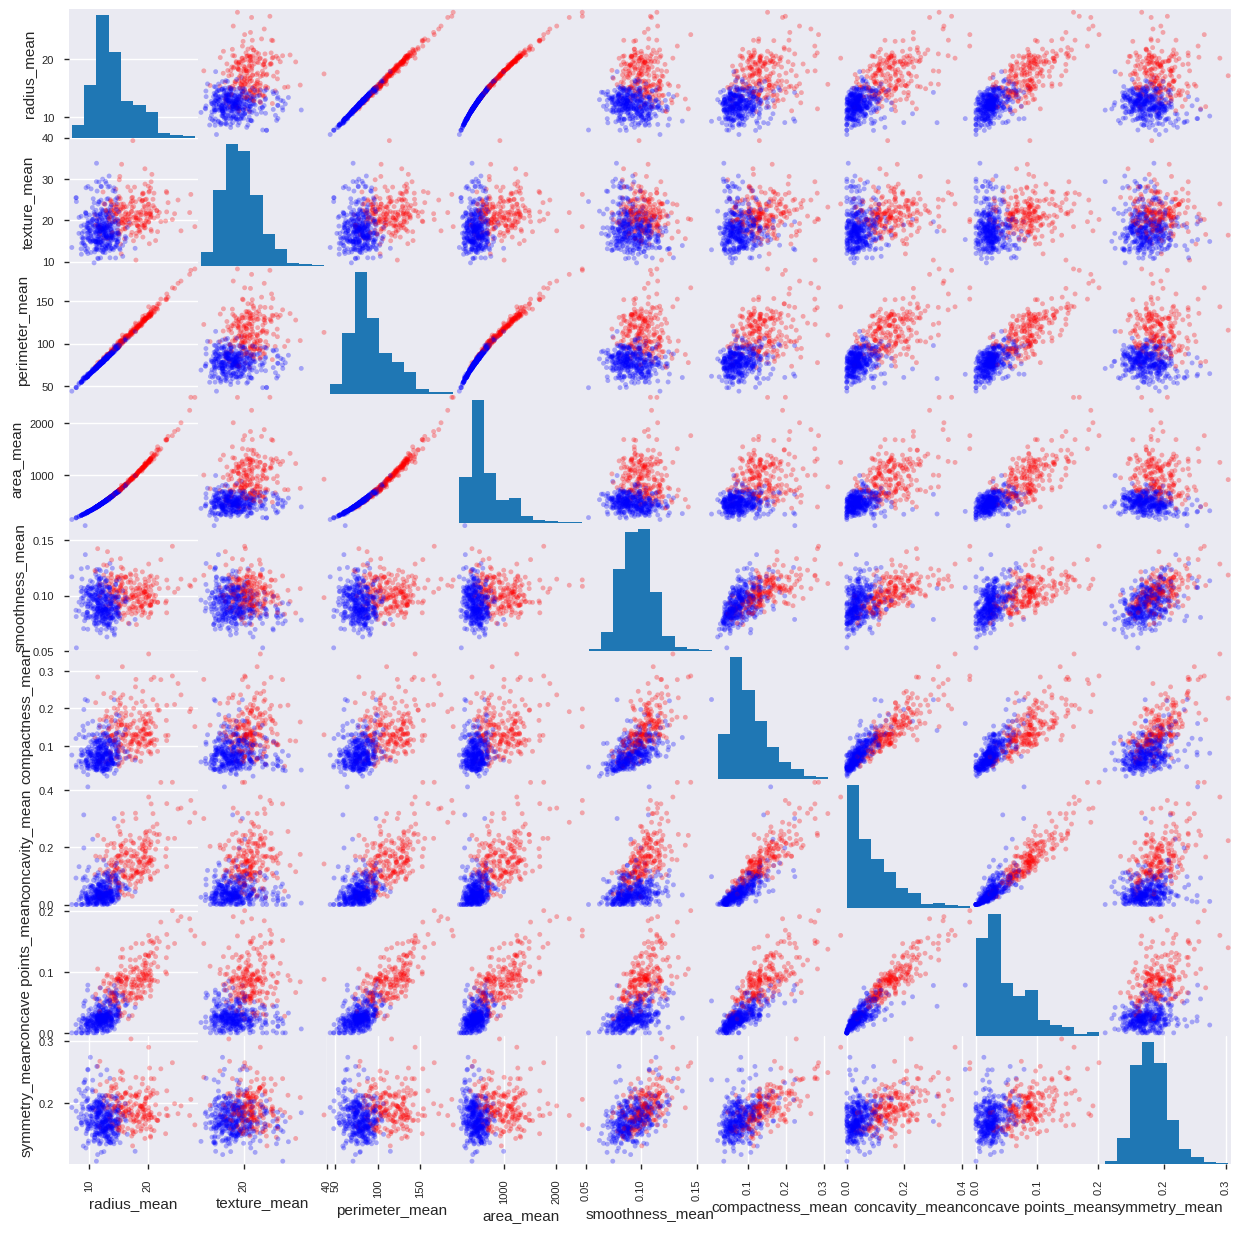

In [7]:
color_dic = {'M':'red','B':'blue'}
colors = data['diagnosis'].map(lambda x:color_dic.get(x))

sm= pd.plotting.scatter_matrix(data[features_mean], c=colors, alpha=0.3, figsize =((15,15)))

plt.show()

In [8]:
colors.head()

0    red
1    red
2    red
3    red
4    red
Name: diagnosis, dtype: object

<h1>Prueba con diferentes modelos y todos las mean_features</h1>

<h2>SGD Classifier (stochastic Gradient Descent<h1>

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score

import time

In [10]:
diag_map = {'M':1,'B':0}
data['diagnosis'] = data['diagnosis'].map(diag_map)

In [11]:
y = data['diagnosis']
X=data[features_mean]
#MIS OPCIONES
X2=data[['radius_mean','texture_mean','smoothness_mean','compactness_mean','concavity_mean']]
X=X.drop('diagnosis',axis=1)
X2

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean
0,17.99,10.38,0.11840,0.27760,0.30010
1,20.57,17.77,0.08474,0.07864,0.08690
2,19.69,21.25,0.10960,0.15990,0.19740
3,11.42,20.38,0.14250,0.28390,0.24140
4,20.29,14.34,0.10030,0.13280,0.19800
...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.24390
565,20.13,28.25,0.09780,0.10340,0.14400
566,16.60,28.08,0.08455,0.10230,0.09251
567,20.60,29.33,0.11780,0.27700,0.35140


In [12]:
#Mantener un  mismo estado 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size = 0.2, random_state = 43)
accuracy_all = []
cvs_all = []

In [13]:
from sklearn.linear_model import SGDClassifier

start = time.time()

clf=SGDClassifier()
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
#scores = cross_val_score(clf,X,y,cv = 5)
clf2=SGDClassifier()
clf2.fit(X2_train,y2_train)
prediction2 = clf2.predict(X2_test)

In [14]:
print(clf.score(X_test,y_test))
print(clf2.score(X2_test,y2_test))

0.7280701754385965
0.5175438596491229


In [15]:
scores = cross_val_score(clf,X,y,cv = 5)
scores.mean()

0.8087110427087341

In [16]:
scores2 = cross_val_score(clf2,X2,y,cv = 5)
scores2.mean()

0.8928972681800692

In [17]:
results = cross_validate(clf2,X,y,return_train_score=True, cv = 5)
results

{'fit_time': array([0.01421356, 0.00970197, 0.00830555, 0.00959897, 0.00786448]),
 'score_time': array([0.00286722, 0.00262547, 0.00273442, 0.00324559, 0.00279021]),
 'test_score': array([0.79130435, 0.64347826, 0.69026549, 0.90265487, 0.88495575]),
 'train_score': array([0.83039648, 0.66519824, 0.68859649, 0.85087719, 0.83114035])}

In [18]:
results2 = cross_validate(clf2,X,y,return_train_score=True, cv = 5)
results2

{'fit_time': array([0.00927281, 0.0081737 , 0.00878811, 0.00683069, 0.00616026]),
 'score_time': array([0.00273252, 0.00262642, 0.0028882 , 0.00253344, 0.0025363 ]),
 'test_score': array([0.72173913, 0.73913043, 0.85840708, 0.87610619, 0.88495575]),
 'train_score': array([0.79515419, 0.73127753, 0.83333333, 0.83991228, 0.85087719])}

In [19]:
from sklearn.model_selection import learning_curve
lc = learning_curve(SGDClassifier(),X,y,cv=5)
samples, train, test = lc[0],lc[1],lc[2]

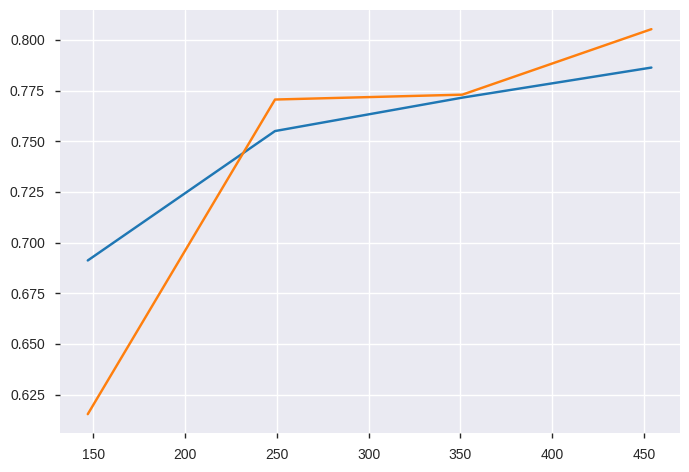

In [20]:
plt.plot(samples[1:], np.mean(train,axis=1)[1:])
plt.plot(samples[1:], np.mean(test,axis=1)[1:])

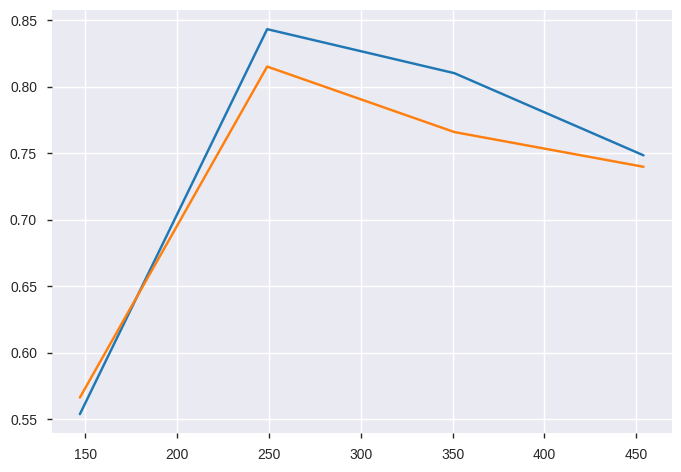

In [21]:
lc = learning_curve(SGDClassifier(),X2,y,cv=5)
samples, train, test = lc[0],lc[1],lc[2]
plt.plot(samples[1:], np.mean(train,axis=1)[1:])
plt.plot(samples[1:], np.mean(test,axis=1)[1:])

<h2>Support Vector Machines</h2>

In [22]:
from sklearn.svm import SVC, NuSVC, LinearSVC

model = SVC()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
model.score(X_test,y_test)

/home/desarrollo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6491228070175439

In [23]:
model2 = SVC()
model2.fit(X2_train,y2_train)
prediction = model2.predict(X2_test)
model2.score(X2_test,y2_test)

/home/desarrollo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9122807017543859

/home/desarrollo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/desarrollo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/desarrollo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/desarrollo/anaconda3/lib/python3.7/si

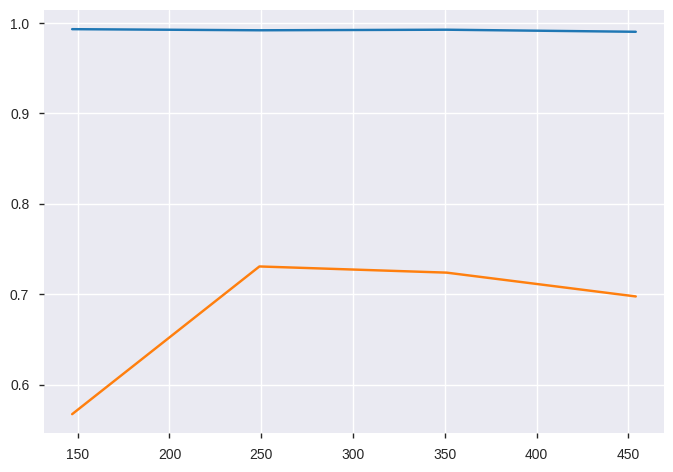

In [24]:
lc = learning_curve(SVC(),X,y,cv=5)
samples, train, test = lc[0],lc[1],lc[2]

plt.plot(samples[1:], np.mean(train,axis=1)[1:])
plt.plot(samples[1:], np.mean(test,axis=1)[1:])

/home/desarrollo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/desarrollo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/desarrollo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/desarrollo/anaconda3/lib/python3.7/si

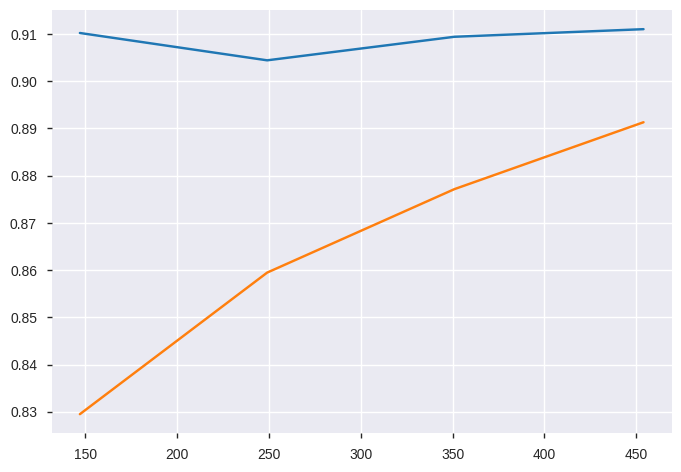

In [25]:
lc = learning_curve(SVC(),X2,y,cv=5)
samples, train, test = lc[0],lc[1],lc[2]

plt.plot(samples[1:], np.mean(train,axis=1)[1:])
plt.plot(samples[1:], np.mean(test,axis=1)[1:])

In [26]:
lc

(array([ 45, 147, 249, 351, 454]),
 array([[0.95555556, 0.93333333, 0.93333333, 0.93333333, 0.93333333],
        [0.91156463, 0.9047619 , 0.91156463, 0.91156463, 0.91156463],
        [0.92369478, 0.91967871, 0.8875502 , 0.89558233, 0.89558233],
        [0.92307692, 0.92592593, 0.9002849 , 0.8974359 , 0.9002849 ],
        [0.92290749, 0.92290749, 0.90528634, 0.89867841, 0.90528634]]),
 array([[0.43478261, 0.37391304, 0.37168142, 0.38053097, 0.38938053],
        [0.83478261, 0.82608696, 0.90265487, 0.81415929, 0.7699115 ],
        [0.83478261, 0.86086957, 0.91150442, 0.84955752, 0.84070796],
        [0.85217391, 0.85217391, 0.91150442, 0.91150442, 0.85840708],
        [0.85217391, 0.85217391, 0.92920354, 0.92920354, 0.89380531]]))

In [27]:
results = cross_validate(model,X,y,return_train_score=True, cv = 5)
results

/home/desarrollo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/desarrollo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/desarrollo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/desarrollo/anaconda3/lib/python3.7/si

{'fit_time': array([0.02663803, 0.02380037, 0.01770425, 0.02291703, 0.02439213]),
 'score_time': array([0.00669312, 0.00605965, 0.00369859, 0.00579143, 0.00550795]),
 'test_score': array([0.69565217, 0.72173913, 0.72566372, 0.7079646 , 0.65486726]),
 'train_score': array([0.99559471, 0.99339207, 0.98245614, 0.99122807, 0.98903509])}

In [28]:
results2 = cross_validate(model2,X2,y,return_train_score=True, cv = 5)
results2

/home/desarrollo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/desarrollo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/desarrollo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/desarrollo/anaconda3/lib/python3.7/si

{'fit_time': array([0.01352477, 0.0117476 , 0.01256585, 0.01217318, 0.01229477]),
 'score_time': array([0.00303578, 0.00307536, 0.00318837, 0.00347257, 0.00396919]),
 'test_score': array([0.85217391, 0.85217391, 0.92920354, 0.92920354, 0.89380531]),
 'train_score': array([0.92290749, 0.92290749, 0.90570175, 0.89912281, 0.90570175])}

<h2> KNN nearest neightbors</h2>

In [29]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train,y_train)
prediction = clf.predict(X_test)

model2 = KNeighborsClassifier()
model2.fit(X2_train,y2_train)
prediction = clf.predict(X_test)

In [30]:
model.score(X_test,y_test)

0.9385964912280702

In [31]:
model2.score(X2_test,y2_test)

0.8596491228070176

In [32]:
result = cross_validate(model,X,y,return_train_score = True, cv = 5)
result

{'fit_time': array([0.00661683, 0.00487161, 0.00456548, 0.00264645, 0.00305104]),
 'score_time': array([0.01048422, 0.00940561, 0.0146699 , 0.01027966, 0.01098228]),
 'test_score': array([0.85217391, 0.85217391, 0.88495575, 0.94690265, 0.89380531]),
 'train_score': array([0.91629956, 0.91409692, 0.90789474, 0.89912281, 0.90789474])}

In [33]:
result2 = cross_validate(model,X2,y,return_train_score = True, cv = 5)
result2

{'fit_time': array([0.00280356, 0.00258517, 0.00520086, 0.00517559, 0.0039289 ]),
 'score_time': array([0.00911856, 0.01001024, 0.01012659, 0.01525164, 0.01268697]),
 'test_score': array([0.83478261, 0.85217391, 0.90265487, 0.92035398, 0.90265487]),
 'train_score': array([0.92290749, 0.9185022 , 0.91447368, 0.90570175, 0.91008772])}

In [34]:
result['test_score'].mean()

0.8860023085802231

In [35]:
result2['test_score'].mean()

0.882524047710658

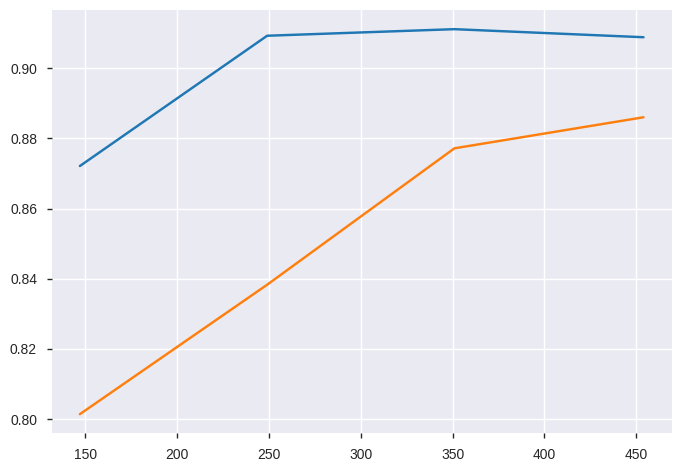

In [36]:
lc = learning_curve(KNeighborsClassifier(),X,y,cv=5)
samples, train, test = lc[0],lc[1],lc[2]

plt.plot(samples[1:], np.mean(train,axis=1)[1:])
plt.plot(samples[1:], np.mean(test,axis=1)[1:])

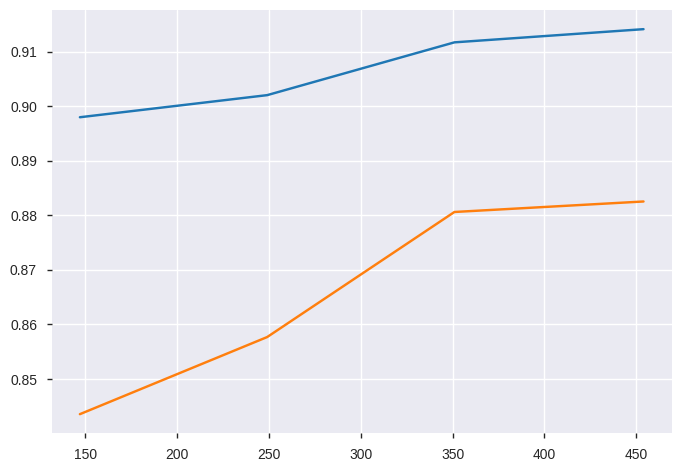

In [37]:
lc = learning_curve(KNeighborsClassifier(),X2,y,cv=5)
samples, train, test = lc[0],lc[1],lc[2]

plt.plot(samples[1:], np.mean(train,axis=1)[1:])
plt.plot(samples[1:], np.mean(test,axis=1)[1:])

<h2>naive bayes</h2>

In [38]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
prediction = clf.predict(X_test)

model2 = GaussianNB()
model2.fit(X2_train,y2_train)
prediction = clf.predict(X_test)


In [39]:
result = cross_validate(model,X,y,cv=5,return_train_score = True)
result

{'fit_time': array([0.00396657, 0.00411844, 0.00501108, 0.00510526, 0.00505137]),
 'score_time': array([0.00242543, 0.002352  , 0.00285411, 0.00246429, 0.00295258]),
 'test_score': array([0.86956522, 0.92173913, 0.91150442, 0.94690265, 0.92035398]),
 'train_score': array([0.92731278, 0.9185022 , 0.9122807 , 0.90350877, 0.91447368])}

In [40]:
result2 = cross_validate(model,X,y,cv=5,return_train_score = True)
result2

{'fit_time': array([0.00347614, 0.00298429, 0.00274706, 0.0027144 , 0.00292373]),
 'score_time': array([0.00168395, 0.00156426, 0.00133896, 0.00144315, 0.00170064]),
 'test_score': array([0.86956522, 0.92173913, 0.91150442, 0.94690265, 0.92035398]),
 'train_score': array([0.92731278, 0.9185022 , 0.9122807 , 0.90350877, 0.91447368])}

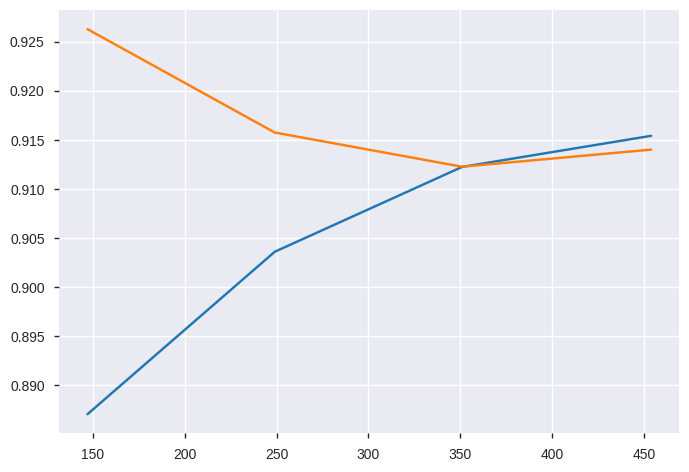

In [41]:
lc = learning_curve(model,X,y,cv=5)
samples, train, test = lc[0],lc[1],lc[2]

plt.plot(samples[1:], np.mean(train,axis=1)[1:])

plt.plot(samples[1:], np.mean(test,axis=1)[1:])

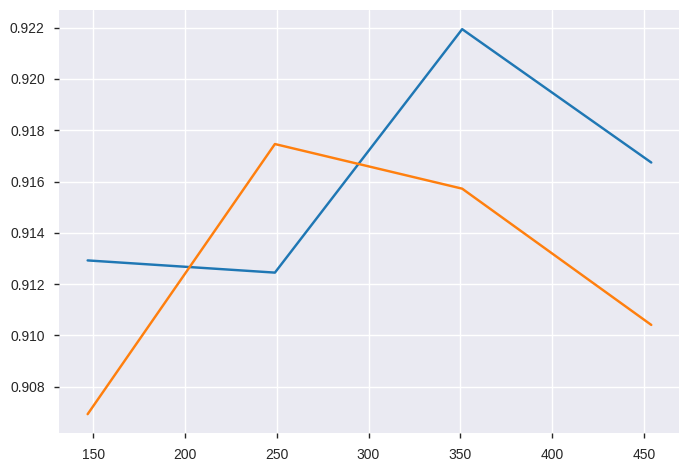

In [42]:
lc = learning_curve(model2,X2,y,cv=5)
samples, train, test = lc[0],lc[1],lc[2]

plt.plot(samples[1:], np.mean(train,axis=1)[1:])
plt.plot(samples[1:], np.mean(test,axis=1)[1:])

In [43]:
model.score(X_test,y_test)

0.9473684210526315

In [44]:
model2.score(X2_test,y2_test)

0.9298245614035088

<h2>bosques y arboles</h2>

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz


In [46]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
model.score(X_test,y_test)

/home/desarrollo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9473684210526315

In [47]:

model2 = RandomForestClassifier()
model2.fit(X2_train, y2_train)
prediction = model2.predict(X2_test)
model2.score(X2_test,y2_test)

/home/desarrollo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9473684210526315

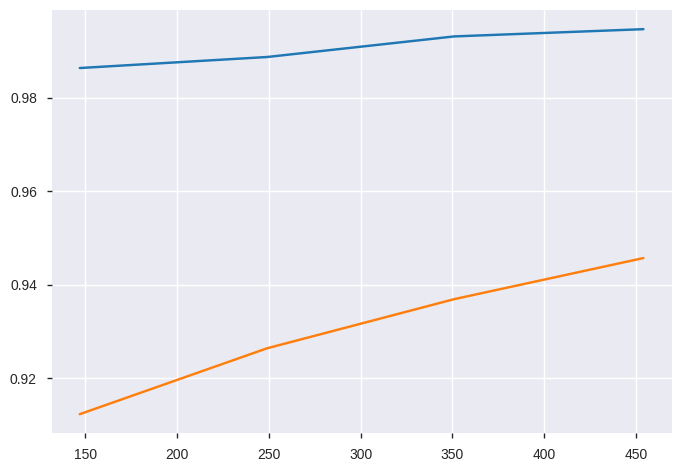

In [48]:
lc = learning_curve(model,X,y,cv=5)
samples, train, test = lc[0],lc[1],lc[2]

plt.plot(samples[1:], np.mean(train,axis=1)[1:])
plt.plot(samples[1:], np.mean(test,axis=1)[1:])

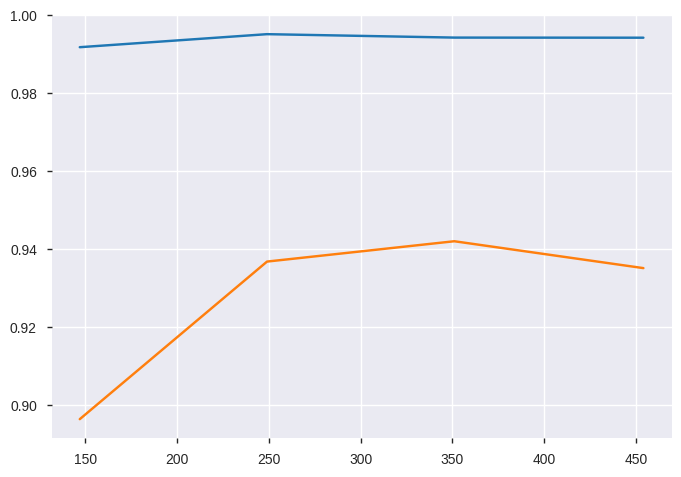

In [49]:
lc = learning_curve(model2,X2,y,cv=5)
samples, train, test = lc[0],lc[1],lc[2]

plt.plot(samples[1:], np.mean(train,axis=1)[1:])
plt.plot(samples[1:], np.mean(test,axis=1)[1:])

In [50]:
results = cross_validate(model,X,y,cv=5,return_train_score = True)
results

{'fit_time': array([0.02414584, 0.03891349, 0.02456713, 0.02204609, 0.02174783]),
 'score_time': array([0.00281405, 0.00297308, 0.00268531, 0.00266385, 0.00265574]),
 'test_score': array([0.90434783, 0.93913043, 0.92035398, 0.97345133, 0.98230088]),
 'train_score': array([0.99559471, 0.98898678, 0.99342105, 0.99561404, 0.99342105])}

In [51]:
results2 = cross_validate(model2,X2,y,cv=5,return_train_score = True)
results2

{'fit_time': array([0.0276413 , 0.02448106, 0.02695608, 0.02602196, 0.01977587]),
 'score_time': array([0.00473523, 0.00273347, 0.00410819, 0.00251842, 0.0025773 ]),
 'test_score': array([0.86086957, 0.94782609, 0.92920354, 0.96460177, 0.92920354]),
 'train_score': array([0.99118943, 0.99339207, 0.99780702, 0.99342105, 0.99122807])}

<h2>Arbol de decisión</h2>

In [52]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
results = cross_validate(model,X,y,cv=5,return_train_score = True)


In [53]:
model2 = DecisionTreeClassifier()
model2.fit(X2_train,y2_train)
results2 = cross_validate(model2,X,y,cv=5,return_train_score = True)


In [54]:
results


{'fit_time': array([0.00718093, 0.00652552, 0.00660825, 0.00710082, 0.00435948]),
 'score_time': array([0.00213623, 0.00209546, 0.00241899, 0.00224876, 0.00158644]),
 'test_score': array([0.87826087, 0.90434783, 0.91150442, 0.95575221, 0.9380531 ]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [55]:
results2

{'fit_time': array([0.00818777, 0.00733232, 0.00763869, 0.0072403 , 0.006078  ]),
 'score_time': array([0.00263   , 0.00264645, 0.00261855, 0.00218368, 0.0020504 ]),
 'test_score': array([0.88695652, 0.87826087, 0.92035398, 0.94690265, 0.9380531 ]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [56]:
treedot = export_graphviz(model, out_file = None, feature_names=X.columns)

In [57]:
treedot2 = export_graphviz(model2, out_file = None, feature_names=X2.columns)

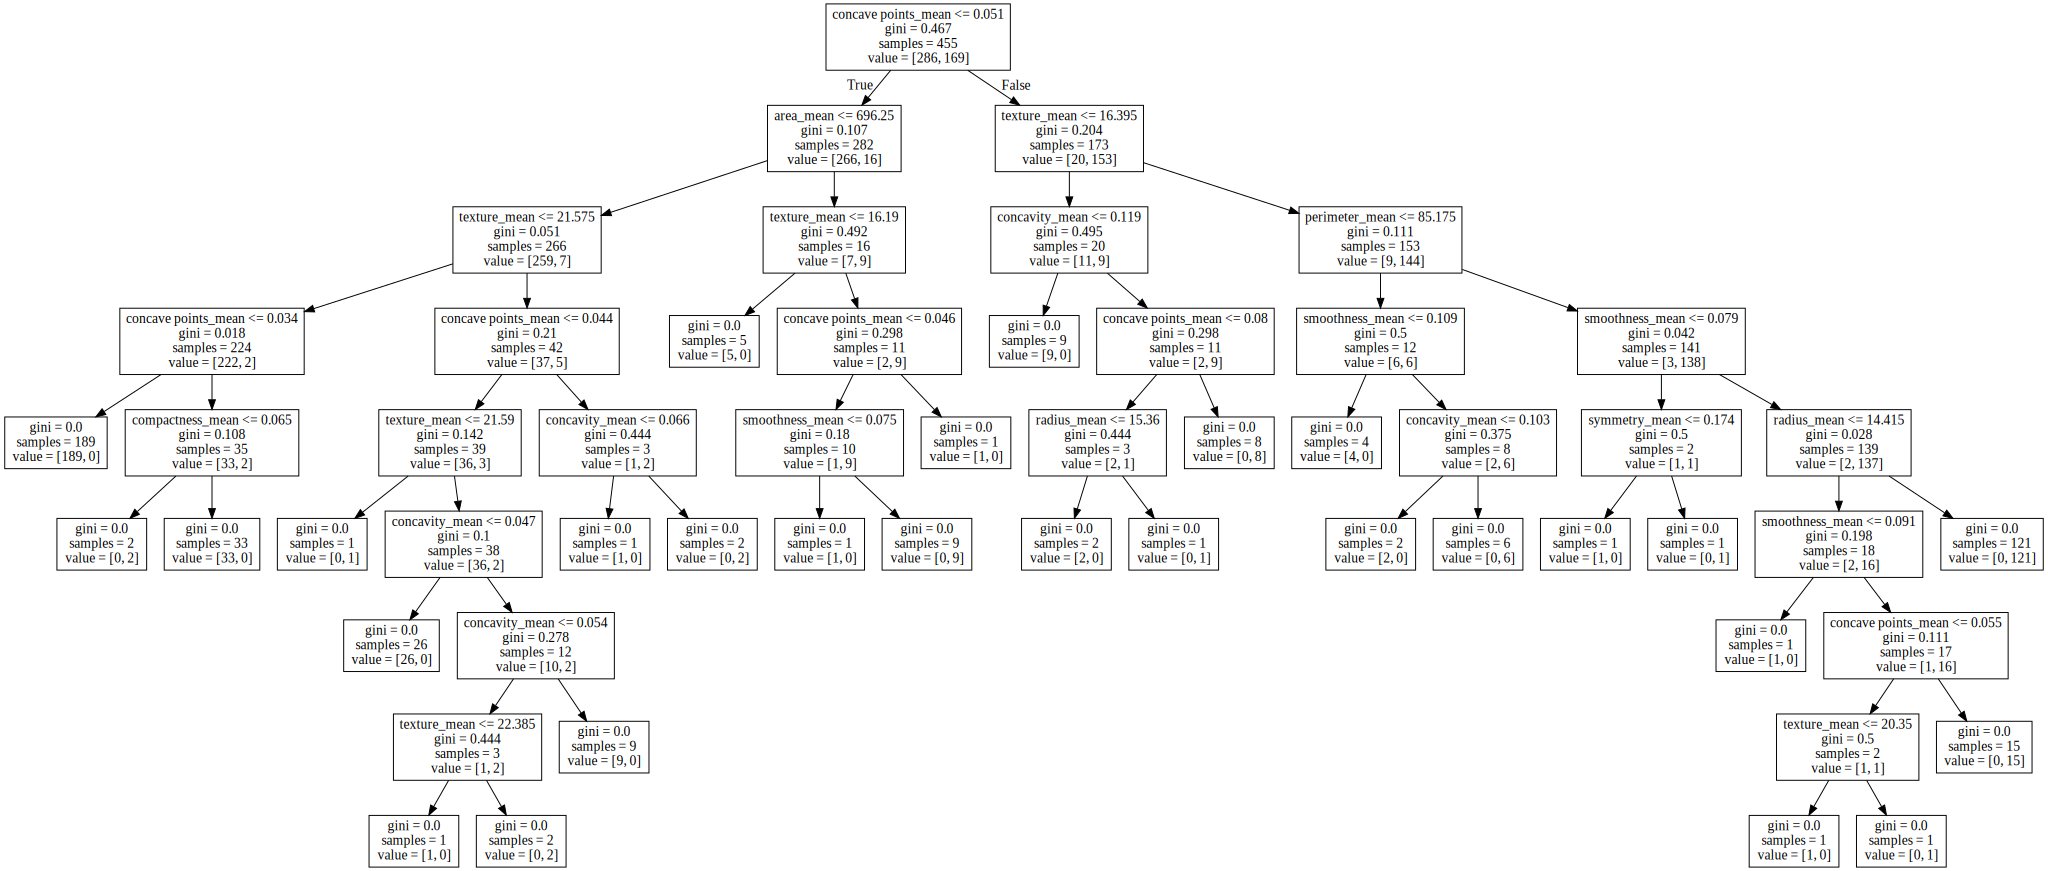

In [58]:

graphviz.Source(treedot)

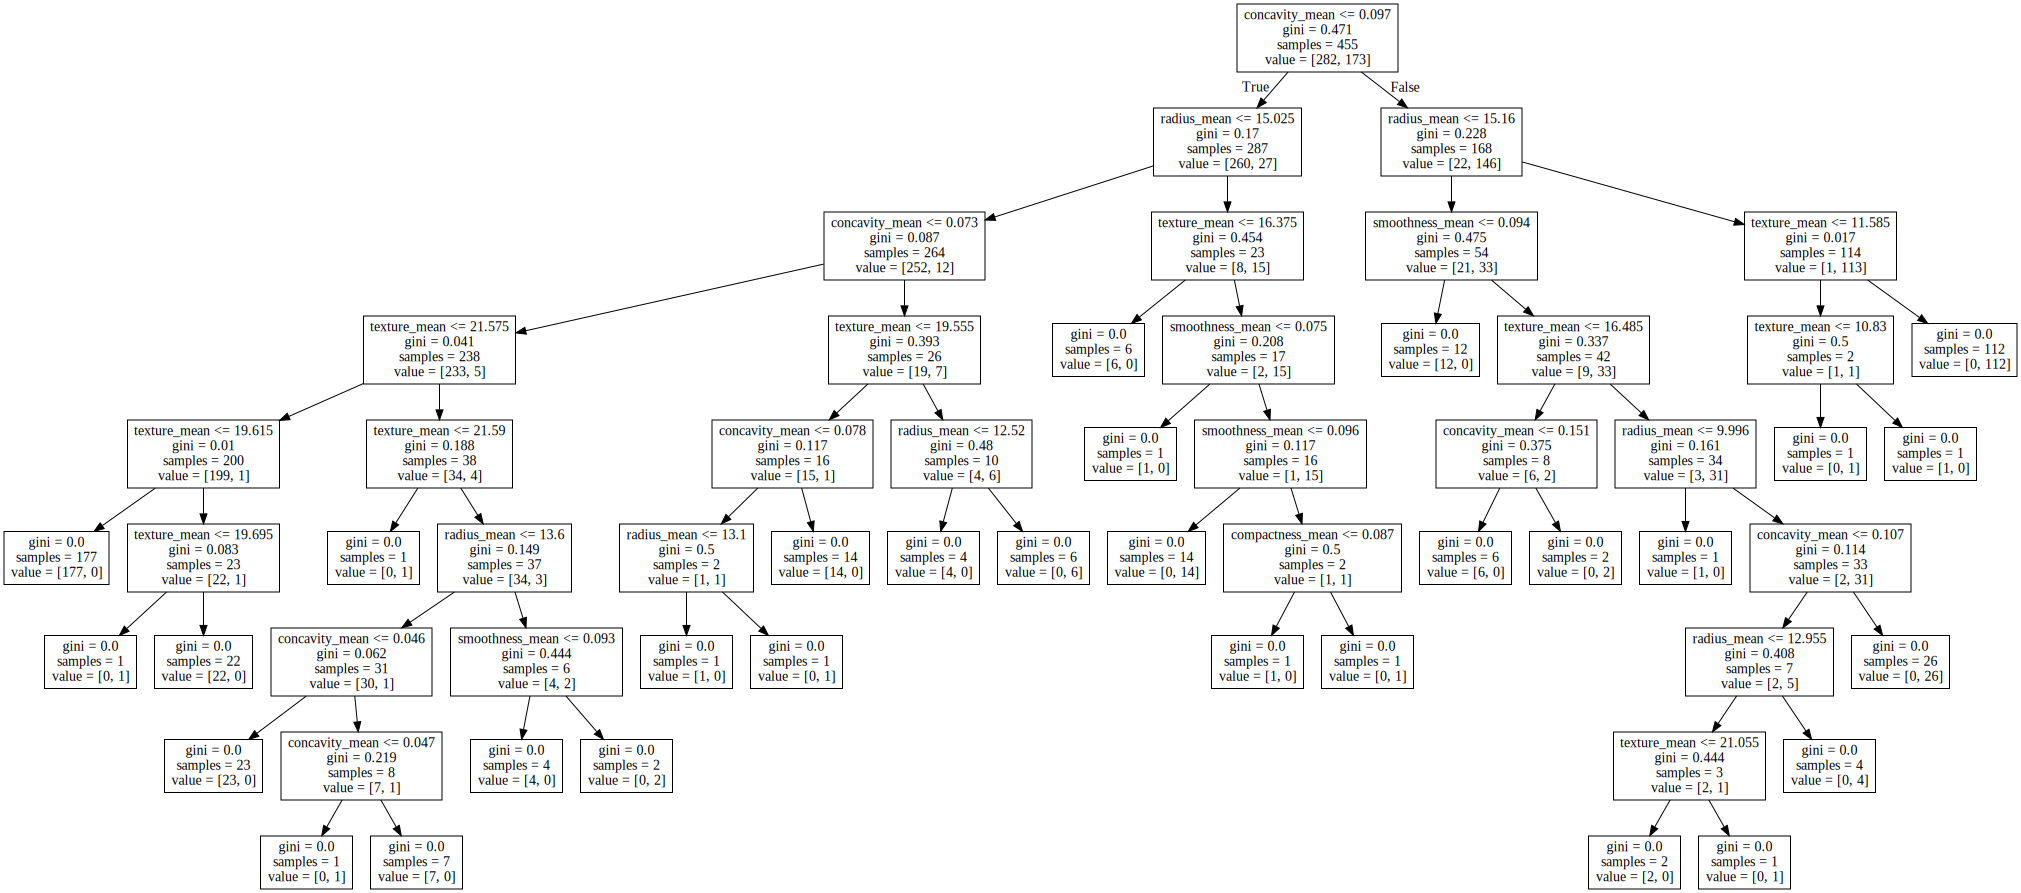

In [59]:
graphviz.Source(treedot2)

In [60]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809
...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397


In [61]:
X2

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean
0,17.99,10.38,0.11840,0.27760,0.30010
1,20.57,17.77,0.08474,0.07864,0.08690
2,19.69,21.25,0.10960,0.15990,0.19740
3,11.42,20.38,0.14250,0.28390,0.24140
4,20.29,14.34,0.10030,0.13280,0.19800
...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.24390
565,20.13,28.25,0.09780,0.10340,0.14400
566,16.60,28.08,0.08455,0.10230,0.09251
567,20.60,29.33,0.11780,0.27700,0.35140


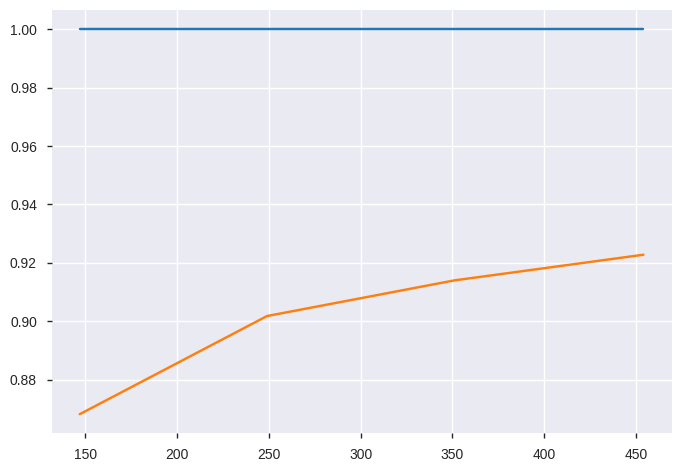

In [62]:
lc = learning_curve(model,X,y,cv=5)
samples, train, test = lc[0],lc[1],lc[2]

plt.plot(samples[1:], np.mean(train,axis=1)[1:])
plt.plot(samples[1:], np.mean(test,axis=1)[1:])

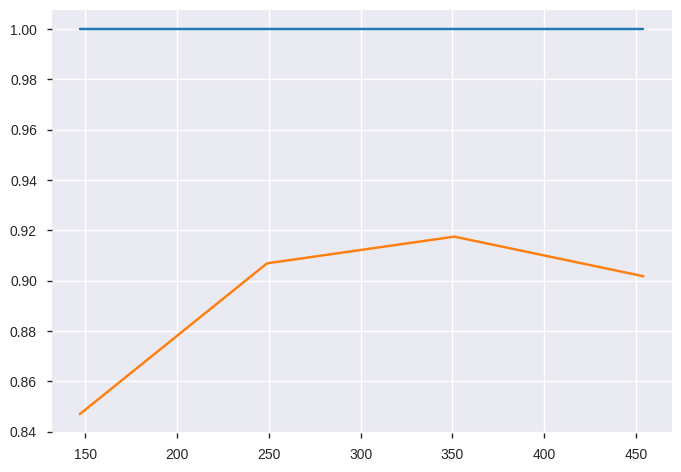

In [63]:
lc = learning_curve(model2,X2,y,cv=5)
samples, train, test = lc[0],lc[1],lc[2]

plt.plot(samples[1:], np.mean(train,axis=1)[1:])
plt.plot(samples[1:], np.mean(test,axis=1)[1:])

<h1>Mejorando los mejores modelos</h1>

In [64]:
from sklearn.model_selection import GridSearchCV

<h2>random forest</h2>

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

parameters = {'n_estimators':list(range(1,101)), 'criterion':['gini', 'entropy']}
clf = GridSearchCV(RandomForestClassifier(), parameters, scoring = 'average_precision', n_jobs=-1)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y,cv=5)


/home/desarrollo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/desarrollo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/desarrollo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/desarrollo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 

In [66]:
scores2 = cross_validate(clf,X,y,cv=5,return_train_score = True)

print(np.mean(scores))
print(clf.best_params_)
print(scores2)


/home/desarrollo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/desarrollo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/desarrollo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/desarrollo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 

0.9761010049640417
{'criterion': 'entropy', 'n_estimators': 67}
{'fit_time': array([39.62301612, 42.23592949, 40.43646431, 38.94628096, 42.28870916]), 'score_time': array([0.00738263, 0.01887178, 0.0154953 , 0.00812125, 0.00817513]), 'test_score': array([0.96100305, 0.96338961, 0.99055178, 0.99157509, 0.98938711]), 'train_score': array([1., 1., 1., 1., 1.])}


/home/desarrollo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [68]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.036735,0.040935,0.014853,0.010658,gini,1,"{'criterion': 'gini', 'n_estimators': 1}",0.807362,0.751645,0.727453,0.762352,0.033518,200
1,0.014462,0.005522,0.004377,0.000211,gini,2,"{'criterion': 'gini', 'n_estimators': 2}",0.886328,0.811619,0.875121,0.857815,0.032879,198
2,0.017152,0.003029,0.007266,0.004052,gini,3,"{'criterion': 'gini', 'n_estimators': 3}",0.925393,0.920736,0.882865,0.909734,0.019032,196
3,0.024657,0.008188,0.004674,0.000214,gini,4,"{'criterion': 'gini', 'n_estimators': 4}",0.904983,0.912877,0.916534,0.911436,0.004829,194
4,0.031207,0.011246,0.011713,0.005513,gini,5,"{'criterion': 'gini', 'n_estimators': 5}",0.959395,0.935726,0.890674,0.928733,0.028514,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.485632,0.044795,0.036218,0.000171,entropy,96,"{'criterion': 'entropy', 'n_estimators': 96}",0.979993,0.976490,0.962139,0.972905,0.007722,63
196,0.698566,0.037233,0.032173,0.012749,entropy,97,"{'criterion': 'entropy', 'n_estimators': 97}",0.983798,0.978761,0.960191,0.974292,0.010149,31
197,0.545969,0.060440,0.040460,0.019777,entropy,98,"{'criterion': 'entropy', 'n_estimators': 98}",0.981658,0.978305,0.966007,0.975351,0.006727,10
198,0.591594,0.188917,0.041175,0.015284,entropy,99,"{'criterion': 'entropy', 'n_estimators': 99}",0.980786,0.977964,0.963218,0.974019,0.007700,40


In [69]:
final_results = cross_validate(clf.best_estimator_, X_train,y_train,return_train_score=True, cv=5)

In [70]:
test_scores = final_results['test_score']
train_scores= final_results['train_score']

print(np.mean(train_scores))
print(np.mean(test_scores))

1.0
0.9407049954876042


In [71]:
estimator = RandomForestClassifier(n_estimators = 67, criterion = 'entropy')

In [73]:
estimator.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=67,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
estimator.score(X_test,y_test)

0.956140350877193

NameError: name 'clf' is not defined